# Machine Learning Engineer Nanodegree
## Capstone Project
### Project Overview
Lendingclub.com is one of the leading online p2p lending platforms, where lenders are matched directly to borrowers. Since its inception in 2007, the total amount of loan reaches almost 8 billion US dollars. There are two ways to invest on lendingclub.com: automatic investing and manual investing. In automatic investing, investors specify the amount of risk they are willing to take, and lendingclub automatically invest their money in a mixed portfolio constructed using their algorithms given the risk. For manual investing, investors can browse the notes and the borrowers' information, and select which notes and how much amount they would like to invest. Furthermore, investors don't necessarily have to browser all the notes, instead they can download those data, use their own algorithm to identify which borrowers to lend their money and process them in a batch fashion. Lendingclub provides historical loan information so that one can build machine learning algorithms to predict loan performances. This project aims at identifying loans that may default so that borrowers can avoid those loans using manual investing. 

There have been many similar efforts at predicting defaults using lendingclub data [1-7]. Although the goal of predicting default is the same, there are differences in feature selection, learning algorithms employed and metrics used for evaluating the model performance. In particular, some of the high performing models (for example, Ref [1-2]) incorrectly used fico scores that were produced after a loan is default, thus the results are highly misleading. Other analysis [3-7] select few features and ignore most of features available in the lendingclub dataset. The most comprehensive feature engineering effort comes from Ref. [8], however, they use a different dataset and their goal is to report whether a loan defaults and how much is the loss if a loan defaults. 

### Problem Statement
In this project, I propose to predict whether a borrower will default so that investors can avoid those borrowers using manual investing feature provided by lendingclub. This, however, does not necessarily lead to highest return on investment (ROI) because by completely avoiding potential defaults, one also avoid riskier loans that may lead to higher ROI even though they default at some point in the future. In order to maximize ROI, one needs to optimize ROI instead. In this project, we work on the simpler problem, that is to predict loan defaults.

Predicting loan defaults is a binary classification problem: a borrower either default at some time during the loan term or finish payment. In reality, the majority of lendingclub loans are between default and full payment, that is, these loans are on-going. Since investors can only invest in lendingclub notes at initial stage, which means investor can not jump into on-going loans, those on-going loans are irrelevant to our discussion. A binary classification problem is a classic machine learning problem with multiple machine learning algorithms to choose from, has quantitative metrics, such as accuracy, precision, f1 score, etc. to measure the results, and is replicable with the same data and machine learning model.


### Metrics
The machine learning task here is an imbalanced two-classed classification, with loan default represents around 20% of all data. Typically f1-score is used for imbalanced classification, however I found that there are two very different f1-scores, depends on which class one is predicting. Instead here I choose area under curve (AUC) as metrics to evaluate learning performance. According to Ref. [9], AUC is a common evaluation metric for binary classification problems. Consider a plot of the true positive rate vs the false positive rate as the threshold value for classifying an item as 0 or is increased from 0 to 1: if the classifier is very good, the true positive rate will increase quickly and the area under the curve will be close to 1. If the classifier is no better than random guessing, the true positive rate will increase linearly with the false positive rate and the area under the curve will be around 0.5. One characteristic of the AUC is that it is independent of the fraction of the test population which is class 0 or class 1: this makes the AUC useful for evaluating the performance of classifiers on unbalanced data sets.

## II. Analysis

### Data Exploration
The dataset comes from lendingclub website `DOWNLOAD LOAN DATA` section: https://www.lendingclub.com/info/download-data.action. According to the website, these files contain complete loan data for all loans issued from 2007 through 2016 Q3. In the following, I will load the dataset and present basic information and statistics.

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

random_state = 46

In [4]:
# load data
RawData = pd.read_csv('data/LoanStats3a_securev1.csv', header=1)
for f in (['data/LoanStats3b_securev1.csv', 'data/LoanStats3c_securev1.csv', 'data/LoanStats3d_securev1.csv', 
             'data/LoanStats_securev1_2016Q1.csv', 'data/LoanStats_securev1_2016Q2.csv', 
              'data/LoanStats_securev1_2016Q3.csv']):
    tmp = pd.read_csv(f, header=1, low_memory=False)
    RawData = RawData.append(tmp)

In [5]:
print RawData.shape

(1218316, 115)


In [6]:
RawData.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,735,739,1,NaN,NaN,3,0,13648,83.7%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-2015,171.62,NaN,Oct-2016,744,740,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


#### Basic information
According to the above analysis, there are 1,218,316 rows and 115 columns in the loan dataset, with one loan example  shown in the cell above. The 115 columns include information such as borrowers' credit history (such as fico score), personal information (such as annual income, years of employment, zipcode, etc.), loan information (description, type, interest rate, grade, etc.), current loan status (Current, Late, Fully Paid, etc.) and latest credit and payment information. You can find the dictionary for the definitions of all data attributes [here](https://resources.lendingclub.com/LCDataDictionary.xlsx). Since there are too many columns, I will selectly explain a few most important columns/features in the following. 

#### Features 
Among those columns, I will use loan information, credit history, personal information as features, and discard columns related to latest credit and payment information. Features include but not limited to (partly shown for simplicity): 
 - `funded_amnt`: funded amount 
 - `term`: term of the loan (36 or 60 months)
 - `grade`: grade of the loan (A to G)
 - `int_rate`: interest rate
 - `emp_length`: employment length
 - `home_ownership`: own, mortgage, rent, or other
 - `annual_inc`: annual income
 - `dti`: debt to income ratio
 - `delinq_2yrs`: delinquency within last 2 years
 - `fico_range_low`: fico score, lower one
 - `fico_range_high`: fico score, higher one
 - `inq_last_6mths`: inquiry within last 6 months
 - `purpose`: purpose of the loan
 
These and related features have been widely used for default prediction [1-8]. There are three types of data in the dataset: numerical, categorical and text. I plan to use all types. Some numerical variables will be converted to categorical ones, and vice versa; text will be treated using bag-of-words representation.

#### Columns that shall not be used
In some of the previous work [1, 2], latest credit information such as `last_fico_range_low` and `last_fico_range_high` were used for prediction and lead to high model performance. However, these features are pulled recently according to the date specified in the `last_credit_pull_d` column. Thus the scores were obtained after a loan was fully paid or default, and their high predictive power is a false illusion because low fico score is the consequence of default but is not a predictor for default. As a result, I will exclude them from features. 

#### Columns that have lots of NULL values
In the following I show the percentage of NULL values for each column that has over 10% NULL data. The percentage data here is only for illustration only, because the actual number will change after data preprocessing detailed in Data Preprocessing section.

In [7]:
# percentage of NULL values for each column that has over 10% NULL values
countNull = RawData.isnull().sum() / len(RawData)
countNull[countNull > 0.1].sort_values(ascending=False)

dti_joint                         0.995765
annual_inc_joint                  0.995761
verification_status_joint         0.995761
desc                              0.896524
mths_since_last_record            0.836744
mths_since_recent_bc_dlq          0.760211
il_util                           0.750048
mths_since_last_major_derog       0.740079
mths_since_rcnt_il                0.718832
all_util                          0.710949
open_acc_6m                       0.710936
total_cu_tl                       0.710936
inq_last_12m                      0.710936
open_rv_12m                       0.710935
open_rv_24m                       0.710935
total_bal_il                      0.710935
open_il_24m                       0.710935
open_il_12m                       0.710935
open_il_6m                        0.710935
max_bal_bc                        0.710935
inq_fi                            0.710935
mths_since_recent_revol_delinq    0.663056
mths_since_last_delinq            0.501849
next_pymnt_

There are three types of columns that mainly consist of NULL values. The first type contains meaningful information such as column `dti_joint`, `annual_inc_joint` (if a borrower doesn't apply the loan jointly with someone else, these two column are NULL), and `mths_since_last_delinq` (months since last delinquency, so if a person has no such history, the column are NULL). The second type is truly missing information, for example, `desc` (description provided by borrowers), `open_acc_6m` and all other columns that has 71.0935% missing data (these are columns that were only recently populated thus missing in previous years). The third type is a mix of the first two types, for example, `mths_since_last_major_derog` is meaningful, yet carefully exam the data shows that the first 10% of loan data is missing. I will keep the first type but remove the second and the third type of columns from features. In the Data Preprocessing section I will provide details on which columns are kept and how to handle missing values for those columns.

#### Labels 
Column `loan_status` will be used as labels for classification task. I first examine the number of loans for each category. 

In [8]:
# count number of loans per loan_status category
grp = RawData.groupby('loan_status', as_index=False).count()[[0,1]]
grp.columns = ['loan_status', 'count']
grp

,loan_status,count
0,Charged Off,78609
1,Current,750682
2,Default,755
3,Does not meet the credit policy. Status:Charge...,761
4,Does not meet the credit policy. Status:Fully ...,1988
5,Fully Paid,337346
6,In Grace Period,8444
7,Issued,16049
8,Late (16-30 days),5176
9,Late (31-120 days),18491


There are 10 different loan status in the raw data. As I mentioned above that investors can only invest in the initial period and can't jump in on-going loans, I will remove all on-going loans (with status Current, Issued). For the rest of the status, status (Fully Paid, and Does not meet the credit policy. Status:Fully Paid) will be categorized as good loan, and status (Charged Off, Default, Does not meet the credit policy. Status:Charged Off, In Grace Period, Late) will be categorized as bad loan. In the following I will process the raw data so that there are only two categories left. 

In [9]:
# Retain only fulled paid, charged off and default loans for classification task
BinaryLoanData = RawData[ (RawData.loan_status == 'Charged Off')
        | (RawData.loan_status == 'Default')
        | (RawData.loan_status == 'Does not meet the credit policy. Status:Charged Off')
        | (RawData.loan_status == 'Does not meet the credit policy. Status:Fully Paid')
        | (RawData.loan_status == 'Fully Paid')]

def convert_loan_status_to_category(x):
    if x.loan_status == 'Fully Paid' or x.loan_status == 'Does not meet the credit policy. Status:Fully Paid':
        return 0
    else:
        return 1

# create a binary class as label for prediction
BinaryLoanData['binary_loan_status'] = BinaryLoanData.apply(convert_loan_status_to_category, axis=1)

/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
# count number of loans for each class
grp = BinaryLoanData.groupby('binary_loan_status', as_index=False).count()[[0,1]]
grp.columns = ['binary_loan_status', 'count']
print grp['count'].sum()
grp

419459


,binary_loan_status,count
0,0,339334
1,1,80125


There are in total 419459 loans left, and they are quite imbalanced, with class 1 (default loan) represents around 20% of total data. In the Methodology section, I will deal with the imbalanced data using undersampling and oversampling techniques.

#### Statistics on numeric data

In [11]:
# statistics about numeric columns
grp = BinaryLoanData._get_numeric_data().describe().drop(['member_id', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
    'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 
    'collections_12_mths_ex_med', 'policy_code'], axis=1)
grp 

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,binary_loan_status
count,419459.000000,419459.000000,419459.000000,419459.000000,419455.000000,419459.000000,419430.000000,419459.000000,419459.000000,419430.000000,193702.000000,59486.000000,419430.000000,419430.000000,419459.000000,419430.000000,90672.000000,244.000000,244.00000,419430.000000,350860.000000,350860.000000,19561.000000,19561.000000,19561.000000,19561.000000,19080.000000,19561.000000,16960.000000,19561.000000,19561.000000,19561.000000,19561.000000,350860.000000,19561.000000,19561.000000,19561.000000,370215.000000,350848.000000,366514.000000,366270.000000,419314.000000,419430.000000,339802.000000,350859.000000,350859.000000,350860.000000,370215.000000,366840.000000,87149.000000,336590.000000,123359.000000,350860.000000,350860.000000,350860.000000,362009.000000,350860.000000,350860.000000,350860.000000,350860.000000,350860.000000,362009.000000,341768.000000,350860.000000,350860.000000,350860.000000,350768.000000,366396.000000,418094.000000,419354.000000,350860.000000,370215.000000,370215.000000,350860.000000,419459.000000
mean,13932.010280,13904.144684,13827.738524,427.147949,73680.744953,17.189658,0.273900,696.775215,700.775332,0.819405,34.780472,73.420754,11.213468,0.167654,15769.327772,25.306068,43.923493,115026.609918,17.99750,0.003989,206.004831,139415.703372,1.232350,2.787281,0.963397,1.991872,18.002463,36856.572108,73.802040,1.572210,3.266091,5759.939216,58.460794,30717.350812,1.153826,1.942999,2.609938,4.594085,13609.384959,8949.854778,63.001302,0.007648,10.070789,125.022422,178.392320,12.623872,7.763139,1.816979,23.370527,40.844072,6.560343,36.664605,0.453574,3.617944,5.601562,4.675914,8.758975,8.462925,8.227014,15.288753,5.573300,11.447166,0.000778,0.003035,0.082742,2.157319,94.778768,49.160904,0.116809,0.030561,169431.299410,46485.698040,20212.645873,38640.474828,0.191020
std,8288.005313,8273.613615,8296.631202,248.604677,62483.073669,23.373579,0.792964,31.711090,31.711638,1.097627,21.890293,29.284442,5.077896,0.492376,20994.456939,11.877239,21.887705,46975.084289,7.60178,0.068260,15557.170251,153638.772003,1.341469,2.969510,1.162154,1.914503,24.302144,41835.235109,21.741018,1.674362,2.810130,5734.498659,21.104890,35187.798354,1.691736,3.249882,2.782429,3.038570,16375.566347,14016.150378,27.630425,0.100159,600.177775,51.106436,89.322087,15.260752,8.567286,2.163521,28.811632,22.367722,5.773451,22.252040,1.188576,2.128481,3.085436,2.733201,4.928854,7.206580,4.253441,8.022918,3.042774,5.109417,0.030204,0.058720,0.468585,1.766660,7.980122,35.260431,0.347889,0.279595,171360.617868,44009.143834,19942.902618,40181.918309,0.393105
min,500.000000,500.000000,0.000000,15.670000,0.000000,0.000000,0.000000,610.000000,614.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,17950.000000,3.12000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

Note that some columns are dropped from the above statistics. They are either columns that are not truly numeric (`member_id` and `policy_code`), or columns that relate to loan payments (for example `total_pymnt`, which is the total amount paid by borrowers). 

#### Columns with anomalies/outliers
It is apparent from the above statistics that there are anomalies/outliers in the dataset, for example, max of `annual_inc` (annual income) is over 8.9 million US dollars and is an order of magnitude than the number at 75 percentile. In the following cell, a list of all the columns that having max value 10 times bigger than the 75 percentage value is shown. 

In [12]:
# find out columns with outliers
outlier_cols = []
for i in range(grp.shape[1]):
    if grp.iloc[6,i] * 10 < grp.iloc[7,i]:
        outlier_cols.append(grp.columns[i])
grp[outlier_cols]

,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_il_6m,open_il_12m,mths_since_rcnt_il,total_bal_il,open_rv_12m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,avg_cur_bal,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_il_tl,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,binary_loan_status
count,419455.000000,419459.000000,419430.000000,419430.000000,419430.000000,419459.000000,419430.000000,350860.000000,350860.000000,19561.000000,19561.000000,19080.000000,19561.000000,19561.000000,19561.000000,350860.000000,19561.000000,19561.000000,350848.000000,366514.000000,419314.000000,419430.000000,350859.000000,350860.000000,370215.000000,366840.000000,350860.000000,350860.000000,341768.000000,350860.000000,350860.000000,418094.000000,419354.000000,350860.000000,370215.000000,370215.000000,350860.000000,419459.000000
mean,73680.744953,17.189658,0.273900,0.819405,0.167654,15769.327772,0.003989,206.004831,139415.703372,2.787281,0.963397,18.002463,36856.572108,1.572210,5759.939216,30717.350812,1.153826,1.942999,13609.384959,8949.854778,0.007648,10.070789,12.623872,7.763139,1.816979,23.370527,0.453574,8.462925,0.000778,0.003035,0.082742,0.116809,0.030561,169431.299410,46485.698040,20212.645873,38640.474828,0.191020
std,62483.073669,23.373579,0.792964,1.097627,0.492376,20994.456939,0.068260,15557.170251,153638.772003,2.969510,1.162154,24.302144,41835.235109,1.674362,5734.498659,35187.798354,1.691736,3.249882,16375.566347,14016.150378,0.100159,600.177775,15.260752,8.567286,2.163521,28.811632,1.188576,7.206580,0.030204,0.058720,0.468585,0.347889,0.279595,171360.617868,44009.143834,19942.902618,40181.918309,0.393105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45000.000000,11.140000,0.000000,0.000000,0.000000,5970.000000,0.000000,0.000000,28812.750000,1.000000,0.000000,5.000000,10802.000000,0.000000,2130.000000,13500.000000,0.000000,0.000000,3069.000000,1192.000000,0.000000,0.000000,4.000000,3.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47147.750000,19978.000000,7300.000000,12875.000000,0.000000
50%,63000.000000,16.730000,0.000000,0.000000,0.000000,11118.000000,0.000000,0.000000,80944.500000,2.000000,1.000000,10.000000,25706.000000,1.000000,4285.000000,22800.000000,1.000000,1.000000,7556.000000,3901.000000,0.000000,0.000000,8.000000,5.000000,1.000000,13.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110161.500000,35286.000000,14100.000000,29151.000000,0.000000
75%,89124.500000,22.720000,0.000000,1.000000,0.000000,19512.000000,0.000000,0.000000,209293.250000,3.000000,1.000000,19.000000,48562.000000,2.000000,7580.000000,38000.000000,2.000000,3.000000,19104.000000,10580.000000,0.000000,0.000000,15.000000,10.000000,3.000000,28.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,246674.250000,58581.000000,26300.000000,52300.000000,0.000000
max,8900060.000000,9999.000000,29.000000,33.000000,54.000000,2568995.000000,6.000000,9152545.000000,8000078.000000,31.000000,20.000000,309.000000,796104.000000,28.000000,135471.000000,9999999.000000,23.000000,44.000000,958084.000000,497445.000000,7.000000,76735.000000,372.000000,197.000000,34.000000,554.000000,30.000000,117.000000,6.000000,4.000000,24.000000,8.000000,53.000000,9999999.000000,2644442.000000,684000.000000,2101913.000000,1.000000


There are two types of anomalies here: the first type is outliers in columns such as `annual_inc` and `dti`, where the variables themselves are continuous numeric data and there are extreme large numbers in the dataset; the second type is not really anomality, they are simply columns that are mostly zero (for example because a person has no history of delinquency). These columns can either be kept as it is, or converted to binary or ordinal variables. For example, `delinq_2yrs` (number of delinquencies within last two years) is can be represented by whether a person has delinquency within 2 years or not. 

#### Non-numeric columns (categorical or text)

In [13]:
# find columns that are not numeric. Irrelevant columns are dropped.
BinaryLoanData.select_dtypes(include=['object']).drop(['id', 'issue_d', 'loan_status', 'pymnt_plan', 
    'url', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'initial_list_status'], axis=1).head(2)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,application_type,verification_status_joint
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,Jan-1985,83.7%,INDIVIDUAL,NaN
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-1999,9.4%,INDIVIDUAL,NaN


The rest of columns contain categorical variables, text data, and variables that are supposed to be numeric (for example `int_rate`): 
- ordinal categorical variables: `term`, `grade`, `sub_grade`, `emp_length`;
- simple categorical variables: `home_ownership`, `verification_status`, `application_type` which have only few categories;
- complex categorical variables: `zip_code`, `addr_state`. These type of categorical variables have too many categories thus are very sparse if one converts them using one-vs-all techniques. One might use economic data (such as average income) at each state and zip code instead;
- columns that should be converted to numeric variables: `int_rate`, `earliest_cr_line` (convert to number of years in credit history), `revol_util`;
- text: `emp_title`, `desc`, `purpose`, `title`;

The details on processing these columns can be found at Data Preprocessing section.

### Exploratory Visualization
In this section, I selectly visualize a few most important and representative features.
#### Representative numeric features
Fico score is one of the deciding factors for loan applications. Usually fico scores are gathered from the top three credit scoring agencies. In the lendingclub dataset, a min and max value of fico scores are present for each borrower. In the following figure, the histogram of `fico_range_low` (min value of the fico scores) and the relationship of `fico_range_low` and `fico_range_high` are shown.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118a3e310>]], dtype=object)

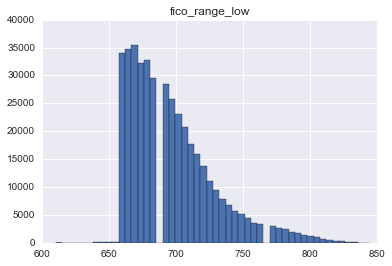

In [14]:
# Histogram of fico_range_low in 50 bins
# x-axis: fico_range_low
# y-axis: number of borrowers
BinaryLoanData.hist('fico_range_low', bins=50)

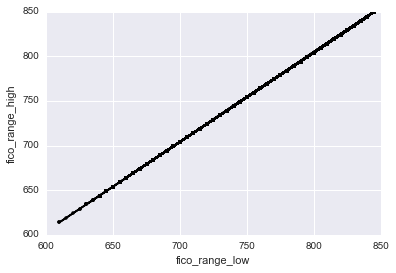

In [15]:
# Relationship between fico_range_low and fico_range_high
# x-axis: fico_range_low
# y-axis: fico_range_high
plt.plot(BinaryLoanData.fico_range_low, BinaryLoanData.fico_range_high, '.-k')
plt.xlabel('fico_range_low')
plt.ylabel('fico_range_high')

Its not surprising that lendingclub only approves application with fico score over 600 and the majority of applications having fico score over 650. Further exam of the data (didn't show here) indicates that loans with fico score between 600 and 650 are the one with `loan_status` "Does not meet the credit policy" but nevertheless issued. Thus `fico_range_low` has a right screwed distribution. There's a linear relationship between `fico_range_low` and `fico_range_high`, thus only one of them is needed in classification task.

To check whether fico score is indeed useful for the classification task, the following figure shows the boxplot of fico score comparing the binary loan status.

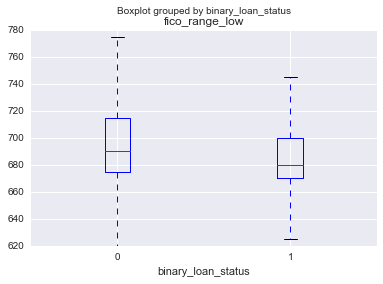

In [16]:
# Boxplot of fico_range_low comparing two binary_loan_status
# x-axis: binary_loan_status
# y-axis: fico_range_low
BinaryLoanData.boxplot(column='fico_range_low', by='binary_loan_status', showfliers=False)

According to the above boxplot, people who fully paid their loan (`binary_loan_status` == 0) has on average higher fico scores of around 690 than that from people who default (`binary_loan_status` == 1 and average fico score 680). Thus fico score is indeed a predicting factor of default. 

#### Representative categorical features
There are several categorical features that are useful for classification task, such as `term`, `home_ownership`, `grade`. In the following figure I select `term` and `grade` as representative categorical features to show that they have predicting power of loan default.

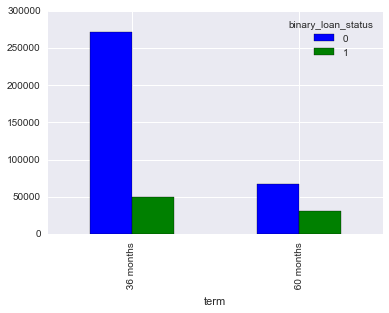

In [17]:
# Barplot of binary_loan_status comparing two different terms 
# x-axis: loan term - either 36 months or 60 months
# y-axis: number of borrowers in each binary_loan_status and term category
BinaryLoanData.groupby(['term', 'binary_loan_status']).size().unstack().plot(kind='bar', stacked=False)

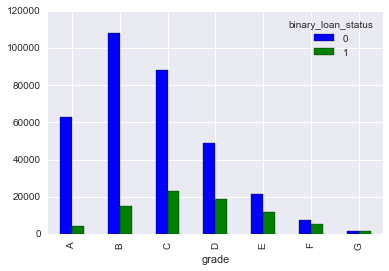

In [18]:
# Barplot of binary_loan_status comparing sever different grades from A to G
# x-axis: loan grade - from A to G
# y-axis: number of borrowers in each binary_loan_status and grade category
BinaryLoanData.groupby(['grade', 'binary_loan_status']).size().unstack().plot(kind='bar', stacked=False)

The above two barplots show that term and grade have predicting power over who default. The ratio of default is higher for loan term 60 months than 36 months; and the ratio of default increases with higher grade. 

#### Time series 
The loan dataset is also a time series with loan initiated different months and years. Here I plot the average loan default rate as a funcition of loan issued date (once per month).

/Users/bdcoe/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


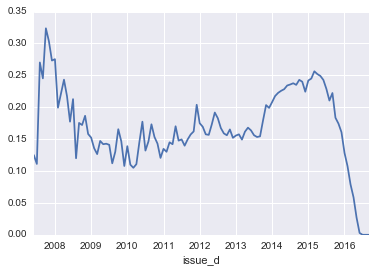

In [19]:
# Average loan default rate as a function of issue_d
# x-axis: issue date
# y-axis: average loan default rate
BinaryLoanData.issue_d = pd.to_datetime(BinaryLoanData.issue_d)
BinaryLoanData.groupby('issue_d').agg(np.mean).binary_loan_status.plot()

The above plot shows that the default rate is high around 2008, and gradually decreases and has less fluctuations from 2009 to mid-2013, and increases after 2014. The reason for the high loan default rate around 2008 is due to financial crisis. The reason for high loan default rate after 2014 is: a typical loan lasts 3 to 5 years, for loans initiated after 2014 most of people are still paying (thus removed from the dataset) and people who already default is included in the dataset and over-represents the population. 


### Algorithms and Techniques
The loan dataset is a time-series dataset with over 400,000 rows and imbalanced data (20% of data belongs to one class), has both numeric and categorical features.

#### Classification algorithms
There are many machine learning algorithms to perform classification. Since the current dataset is relatively large with over 400,000 rows, algorithms such as Support Vector Machine and K-nearest Neighbor will take too long to train and won't be used here. Here I intend to use Naive Bayes, Logistic Regression and Ensemble Methods (Random Forest), all available in sklearn.

##### Naive Bayes
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. [http://scikit-learn.org/stable/modules/naive_bayes.html]. 

In this project I intend to use Gaussian Naive Bayes classification method implemented in scikit-learn. Gaussian Naive Bayes assumes the likelihood of the features to be Gaussian. There's only one parameter for the algorithm: the class prior. The default value for class prior is the probably of each class, which is a reasonable assumption here.

##### Logistic Regression
Logistic Regression is a method to estimate the probability of a binary response based on one or more independent variables. Logistic function can be written as 

<center> $\displaystyle F(x) = \frac{1}{1+e^{-{\beta_0 + \beta_1 x}}}$ </center>

where $x$ are independent variables, and $F(x)$ is the probability of the dependent variable to be predicted. As one can see from the above logistic function, only linear relationship between the independent variables are taken into account, thus the model can't capture any non-linear relationship between features. 

One of the problem with logistic regression is that coefficients $\beta_i$ are unbound and can take extreme values, making other features useless and model unstable. There are several ways to introduce regularization. Here I use the logistic regression method implemented in scikit-learn, in which $C$ and `penalty` are the regularization parameters. $C$ is a numeric continuous value inserted into logistic function and the default value is 1. `penalty` takes two choices: L1 and L2 regularization with the default value being L2 regularization. L1 regularization is very useful if one needs to reduce dimensions of features since it tends to produce more zero coefficients. 

Since the class is not balanced in the lendingclub dataset, I also plan to tune the `class_weight` parameter available in the logistic regression method in scikit-learn. The default value is None; one can also choose 'balanced' or define their own class_weight.

##### Random Forest
Ensemble Methods combine the results of many base models (weak learners), can handle categorical variables and outliers very well, and can handle non-linear relationship between features. Although its relatively slower to train compared to Naive Bayes or Logistic Regression, the training time is still reasonable given the current dataset size. 

In this project I chose Random Forest, which combines the results of many decision trees. Decision trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features [http://scikit-learn.org/stable/modules/tree.html]. Decision trees tend to overfit the data. In the extreme case of a decision tree having one leaf for every data point, the training precision will be 100%, but the result won't be able to generalize. Random forest combines multiple such decision trees and optimize the combined model. 

As discussed above, the major problem for decision trees and random forest is overfitting. There are several parameters to tune in random forest implementation in scikit-learn: `n_estimators` (number of trees to grow), `min_samples_split` (minimum number of data points to split a tree), `min_samples_leaf` (minimum number of data points for leaf). In addition, I also plan to tune `max_features` (maximum number of features to use to split tree), `bootstrap` (whether bootstrap samples are used when building trees). The reason for bootstrap is because the data is imbalanced and one can use bootstrap to enhance the representation of the class with less data.  

#### Under or over-sampling for imbalanced data
The loan dataset is imbalanced with 20% representing one class. I intend to use under or over-sampling techniques, implemented in the `imbalanced-learn` package [http://contrib.scikit-learn.org/imbalanced-learn/index.html] and compare the modeling result with the one without sampling. In both under and over-sampling technique, the returned data has balanced class label of 50% for each binary class. 

#### Rolling cross valication on time-series data
With time-series data, if random or stratified cross-validation split is performed, we might end up predicting earlier loans using later loans, which is not reasonable. A better way is to perform rolling cross validation (forward chaining) according to Ref. [10], where set 1-6 are time-ordered data: 
- fold 1 : training [1], test [2]
- fold 2 : training [1 2], test [3]
- fold 3 : training [1 2 3], test [4]
- fold 4 : training [1 2 3 4], test [5]
- fold 5 : training [1 2 3 4 5], test [6]

scikit-learn provides time-series split for rolling cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

### Benchmark
One baseline benchmark result is the one from random guessing or always predicting one class for all data:

In [20]:
from sklearn import metrics 

y_test = BinaryLoanData.binary_loan_status
np.random.seed(random_state)

y_predict = np.random.uniform(low=0, high=1, size=len(BinaryLoanData))
print 'AUC from random guessing :', metrics.roc_auc_score(y_test, y_predict)

y_predict = np.random.uniform(low=0.5, high=1, size=len(BinaryLoanData))
print 'AUC from always predicting default :', metrics.roc_auc_score(y_test, y_predict)


AUC from random guessing : 0.500215060303
AUC from always predicting default : 0.500495302301


As shown above, random guessing or always predicting one label give AUC slightly better than 0.5. 

There are also previous machine learning results using lendingclub loan data to compare with: 
- Ref [3]: AUC 0.698
- Ref [5]: AUC 0.732
- Ref [6]: AUC 0.713



## III. Methodology

### Data Preprocessing
In this section, all the data preprocessing steps are documented. 
#### Convert numeric variables to correct format 
`int_rate` and `revol_util` are supposedly numeric variables, however, it was loaded as if they are string since they have '%' in the data. Here I convert them into the correct numeric format. 

In [21]:
# Remove % from int_rate and revol_util and convert them to float number
BinaryLoanData.int_rate = BinaryLoanData.int_rate.str.replace('%', '').astype(float) / 100.
BinaryLoanData.revol_util = BinaryLoanData.revol_util.str.replace('%', '').astype(float) / 100.

#### Convert datetime variable to usable numerical variable
`earliest_cr_line` is a datetime variable indicating the earliest credit line a borrower has. Here I convert it to number of years with credit history `cr_num_years`.

In [22]:
# convert earliest_cr_line to number of years of credit history cr_num_years
from datetime import datetime
def get_cr_num_years(x):
    return x.issue_d.year - x.earliest_cr_line.year

BinaryLoanData.issue_d = pd.to_datetime(BinaryLoanData.issue_d)
BinaryLoanData.earliest_cr_line = pd.to_datetime(BinaryLoanData.earliest_cr_line)
BinaryLoanData['cr_num_years'] = BinaryLoanData.apply(get_cr_num_years, axis=1)

/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Convert ordinal variables to numeric variables
`term`, `grade` and `subgrade` are ordinal variables and are simply converted to ordered numeric values. Instead of over-writting the existing data, I created new columns with old variable name appended with `_c` indicating that they are converted. 

In [23]:
# convert term, grade and sub_grade to nominal category variables with numeric data
def convert_term_to_category(x):
    if x == ' 36 months':
        return 0
    elif x == ' 60 months':
        return 1
    else:
        return 

# sort grade
grades = sorted(pd.unique(BinaryLoanData.grade))
def convert_grade_to_category(x):
    return grades.index(x)

# sort sub_grade
subgrades = sorted(pd.unique(BinaryLoanData.sub_grade))
def convert_subgrade_to_category(x):
    return subgrades.index(x)

# create new columns for these ordered numeric variables
BinaryLoanData['term_c'] = BinaryLoanData.term.apply(convert_term_to_category)
BinaryLoanData['grade_c'] = BinaryLoanData.grade.apply(convert_grade_to_category)
BinaryLoanData['sub_grade_c'] = BinaryLoanData.sub_grade.apply(convert_subgrade_to_category)


/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

#### Convert nominal variables to ordered numeric variables
`home_ownership` has multiple classes, however, according to the average binary loan status in each class shown in the next cell, class MORTGAGE, NONE has relatively lower default rate, class OWN has intermediate default rate, and class RENT and OTHER have higher default rate. Here I group them into ordered numeric values and store the data in a new column `home_ownership_c`. Note, class ANY has too few data points so I group them together with class MORTGAGE and NONE. 

In [24]:
# Examine the available categories in home_ownership, and find out the average of binary_loan_status in each category
BinaryLoanData.groupby('home_ownership').agg(np.mean).binary_loan_status

home_ownership
ANY         0.000000
MORTGAGE    0.166703
NONE        0.166667
OTHER       0.212291
OWN         0.198244
RENT        0.218987
Name: binary_loan_status, dtype: float64

In [25]:
# convert home_ownership to ordinal category variable with numeric values
# Combine ANY, MORTGAGE, NONE into one class
def convert_home_ownership_to_category(x):
    if (x == 'RENT') or (x == 'OTHER'):
        return 2
    elif (x == 'OWN'):
        return 1
    else:
        return 0
    
BinaryLoanData['home_ownership_c'] = BinaryLoanData.home_ownership.apply(convert_home_ownership_to_category)

/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Combine similar classes in categorical variables and convert to numeric variables
`verification_status` has three classes, Not Verified, Source Verified and Verified. The last two classes are in fact the same class. They are combined and converted to numerical variable `verification_status_c`.

In [26]:
BinaryLoanData.groupby('verification_status').binary_loan_status.mean()

verification_status
Not Verified       0.145025
Source Verified    0.208214
Verified           0.217667
Name: binary_loan_status, dtype: float64

In [27]:
# convert verification_status to category variable
def convert_verification_status_to_category(x):
    if (x == 'Source Verified') or (x == 'Verified'):
        return 1
    else:
        return 0
BinaryLoanData['verification_status_c'] = \
   BinaryLoanData.verification_status.apply(convert_verification_status_to_category) 

/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Convert ordinal variables with missing data to numeric values
`emp_length` is an ordinal variable indicating length of employment ranging from not available/unemployed, less than 1 year, to a list of 1 to 9 years and 10+ years (see the next cell for a list of all classes). Among them, 1-9 years are simply converted to their corresponding numerical values; while '< 1 year', '10+ year' and 'n/a' have to be dealt separately. Here I convert '< 1 year' to 0.5, '10+ year' to 10. Since 'n/a' has an average higher rate of default (0.27 compared to around 0.19 for other classes), I create a dummy variable for 'n/a': `emp_length_isnull`.

In [28]:
# Get a list of all classes for emp_length, and get the average loan default rate for each class
BinaryLoanData.groupby('emp_length').agg(np.mean).binary_loan_status

emp_length
1 year       0.191891
10+ years    0.180178
2 years      0.185584
3 years      0.187893
4 years      0.186932
5 years      0.185352
6 years      0.192613
7 years      0.191391
8 years      0.195156
9 years      0.197072
< 1 year     0.200117
n/a          0.268698
Name: binary_loan_status, dtype: float64

In [29]:
# convert employee length to numeric values, and create a dummy variable for whether the borrower is employed
dummy_number = 999
def convert_emp_length_to_category(x):
    a = x.replace(' years', '').replace(' year', '')
    if a == 'n/a':
        return dummy_number
    elif a == '< 1':
        return 0.5
    elif a == '10+':
        return 10.0
    else:
        return float(a)

BinaryLoanData['emp_length_isnull'] = (BinaryLoanData.emp_length == 'n/a').astype(int)
BinaryLoanData['emp_length_c'] = BinaryLoanData.emp_length.apply(convert_emp_length_to_category)


/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Convert nominal variables using 1-vs-K method
`purpose` is a nominal variable with multi-classes indicating the purpose of the loan. The following cell shows the average default rate for each purpose class. Some of the classes have significantly lower default rate such as car and wedding (around 0.13) compared to others such as small_business (0.30). Although there are classes having similar default rate, here I choose not to combine them because there is no simple meaning for such combination. I will convert them using 1-vs-K method and create K number of variables, with K being the number of unique purpose.  

In [30]:
BinaryLoanData.groupby('purpose').agg(np.mean).binary_loan_status

purpose
car                   0.129619
credit_card           0.163493
debt_consolidation    0.201184
educational           0.208038
home_improvement      0.164478
house                 0.186916
major_purchase        0.155348
medical               0.216939
moving                0.225153
other                 0.209307
renewable_energy      0.216802
small_business        0.296827
vacation              0.191849
wedding               0.127145
Name: binary_loan_status, dtype: float64

In [31]:
# convert purposes into one-of-K encoding
# one can also use sklearn oneHotEncoder, but it needs the data first to be transformed into numeric value, and
# then use OneHotEncoder, and has to rename the columns as well. 
purposes = pd.unique(BinaryLoanData.purpose)
for item in purposes:
    BinaryLoanData['purpose_%s'%(item)] = (BinaryLoanData.purpose == item).astype(int)

/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Create dummy variables for some columns with NULL values
`mths_since_last_record` and `mths_since_last_delinq` are numerical variables that have meaningful NULL values (if a borrow doesn't have public record or delinquency, these columns are NULL), and don't have systematic data missing in the earlier loans (details on how to get these columns are in the following subsections). Here I create dummy variables `mths_since_last_record_isnull` and `mths_since_last_delinq_isnull` to represent them, and fill the NULL values with a dummy number.

In [32]:
for col in ('mths_since_last_record', 'mths_since_last_delinq'):
    print '%30s, %5.2f, %5.2f'%(col, BinaryLoanData[BinaryLoanData[col].isnull()].binary_loan_status.mean(), \
                                     BinaryLoanData[BinaryLoanData[col].notnull()].binary_loan_status.mean() ) 
    BinaryLoanData[col+'_isnull'] = BinaryLoanData[col].isnull().astype(int)
BinaryLoanData['mths_since_last_record'] = BinaryLoanData.mths_since_last_record.fillna(dummy_number)
BinaryLoanData['mths_since_last_delinq'] = BinaryLoanData.mths_since_last_delinq.fillna(dummy_number)

        mths_since_last_record,  0.19,  0.21
        mths_since_last_delinq,  0.19,  0.20

/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


`desc`, `title`, `emp_title` are text variables with NULL values, while `annual_inc_joint` is numerical variables with NULL values. According to the following cell, average default loan rates are different between borrows who provided those data and who do not. Here I convert each into a dummy variable representing whether that column is null or not. One can still use the text in `desc`, `title` and `emp_title` as features, as done in Ref. [1], but here I discard them for simplicity. 

In [33]:
for col in ('desc', 'title', 'emp_title', 'annual_inc_joint'):
    print '%30s, %5.2f, %5.2f'%(col, BinaryLoanData[BinaryLoanData[col].isnull()].binary_loan_status.mean(), \
                                     BinaryLoanData[BinaryLoanData[col].notnull()].binary_loan_status.mean() ) 
    BinaryLoanData[col+'_isnull'] = BinaryLoanData[col].isnull().astype(int)

                          desc,  0.20,  0.16
                         title,  0.10,  0.19
                     emp_title,  0.26,  0.19
              annual_inc_joint,  0.19,  0.09


/Users/bdcoe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


#### List of columns to be dropped
This list includes 
- cols_irrelevant: irrelevant columns (such as `id`) and columns that shall not be used for classification (such as `total_pymnt`), see the comments in the following cell for details;
- cols_notused: columns that are not used in this study, but may be converted to econometric values in future study;
- cols_duplidated_info: columns that contain duplicated information in other columns;
- cols_converted: columns that are converted (for example, `term` is converted to `term_c`) so the original columns are not used instead the new columns are used; 

In [34]:
cols_irrelevant = ['id', 'member_id', 'policy_code', # id, member_id and policy code are meaningless
    'funded_amnt', 'funded_amnt_inv', # funded amount and funded amount for investors. With manual investing, 
                                      # one only gets information on loan_amnt, so these two columns are irrelevant
    'loan_status', # the original loan_status is converted to binary_loan_status column, so this one is not used        
    'pymnt_plan', 'url', 'initial_list_status', # payment plan, url of the loan, initial list status are irrelevant
    'out_prncp', 'out_prncp_inv', 'total_pymnt', # Remaining outstanding principle of the loan and the part for investor
                                                 # total payment are irrelevant for classification
    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
    # total payment to investors, total principle and interest received, late fees and recoveries fees are irrelevant 
    'collection_recovery_fee', 'next_pymnt_d', 'last_pymnt_amnt', 'last_pymnt_d', 
    # collections on recovery fee, next payment date, last payment amount and date are irrelevant
    'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low']
    # last date credit history was pulled and fico scores. These are the fico scores pulled recently in 2016
    # and shall not be used in classification.

# These columns are not used in this study, but might be converted to econometric values 
# such as average income in certain zip codes and states.
cols_notused = ['zip_code', 'addr_state', ]

# columns contain duplicated information
cols_duplicated_info = ['fico_range_high', # fico_range_high is linearly correlated with fico_range_low
                        'dti_joint', 'verification_status_joint', # same information as annual_inc_joint
                        'application_type' # same information as annual_inc_joint
                       ]

# these columns are converted to new columns and the original columns are thus dropped
cols_converted = ['term', 'grade', 'sub_grade', 'home_ownership', 'emp_length', 'mths_since_last_record',
                  'mths_since_last_delinq', 'desc', 'title', 'emp_title', 'purpose',
                  'annual_inc_joint', 'verification_status', 'earliest_cr_line']


#### Columns with systematic data missing in early loans
There are a number of columns that are not populated in early loan data. In the following cell, I found out these columns, and will drop the columns that have at least 10% data missing in early loans. 

In [35]:
# Remove columns that are not populated in the early loan data, 
# and columns that have high percentage of missing values
def percentage_initial_data_missing(x):
    c = 0
    for i in x:
        if pd.isnull(i):
            c += 1
        else:
            return float(c) / len(x)
    return float(c) / len(x)

# get list of columns with over 0.1% null values
countNull = BinaryLoanData.drop(cols_irrelevant + cols_notused + 
                cols_duplicated_info, axis=1).isnull().sum() / len(BinaryLoanData)
colNull = countNull[countNull > 0.001].index

# from these columns, get the columns that have at least 10% data thats not populated in early loans. 
cols_initial_data_missing = []
for col in colNull:
    p1 = percentage_initial_data_missing(BinaryLoanData[col])
    if  p1 > 0.1:
        cols_initial_data_missing.append(col)
        #print '%30s, %5.2f'%(col, p1)


#### Remove outliers and drop columns
In the Data Exploration section, I have identified that annual_inc, dti and revol_bal are numeric variables with outliers. It's unclear whether those extreme large values are reasonable values or something is wrong in the data (for example, typos). As a result,  I remove these outliers according to a quantile_threshold: all the data beyond 99.7 percentile for each column are removed. 

Columns to be dropped are a combined list of cols_irrelevant, cols_notused, cols_duplicated_info, cols_converted and cols_initial_data_missing. 

In [36]:
# Generate the final list for all the columns to be dropped
cols_todrop = cols_irrelevant + cols_notused + cols_duplicated_info + cols_converted + cols_initial_data_missing 

In [37]:
# Remove outliers for annual_inc, dti and revol_bal according to quantile_threshold. 
quantile_threshold = 0.997
ReducedLoanData = BinaryLoanData[(BinaryLoanData.annual_inc < BinaryLoanData.annual_inc.quantile(quantile_threshold))
    & (BinaryLoanData.dti < BinaryLoanData.dti.quantile(quantile_threshold))
    & (BinaryLoanData.revol_bal < BinaryLoanData.revol_bal.quantile(quantile_threshold))
    ].drop(cols_todrop, axis=1)

#### Convert some columns with outliers to ordinal variables
`delinq_2yrs`, `inq_last_6mths`, `pub_rec`, `delinq_amnt` and `tax_liens` have mainly zero values and a few large values which still seem reasonable so I don't throw these data away. Machine learning algorithms that are distance based such as support vector machine is very sensitive to large values. As a result I convert them to new ordinal variables according to a quantile_threshold: all zero data will be class 0, all data larger than 0 but smaller than 95 percentile of all non-zero data will be class 1, and the rest will be class 2. Depends on the machine learning algorithms, I will choose to use the original numeric variables if the algorithm is insensitive to outliers such as random forest, or the new ordinal variables if the algorithm is distance based. 

In [38]:
def convert_numeric_to_ordinal(x):
    if x == 0:
        return 0
    elif x > 0 and x <= q:
        return 1
    else:
        return 2
quantile_threshold2 = 0.95
for col in ('delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'delinq_amnt', 'tax_liens'):
    q = ReducedLoanData[ReducedLoanData[col] > 0][col].quantile(quantile_threshold2)
    ReducedLoanData[col+'_c'] = ReducedLoanData[col].apply(convert_numeric_to_ordinal)

#### Remove some rows with systematic data missing
There are 25 rows having delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, total_acc all missing. Here I remove these rows.

In [39]:
ReducedLoanData = ReducedLoanData[ReducedLoanData.delinq_2yrs.notnull()]

#### Fill NA values in some columns
revol_util column has a number of missing values. Since revol_util is highly correlated with revol_bal, I divide revol_bal into buckets of $10000 interval, and fill the missing revol_util with the average revol_util in the corresponding bucket of revol_bal. 

In [40]:
# infer missing revol_bal using the mean revol_bal of whom with revol_bal in the same bucket
# (using every $10000 as a bucket)
def revol_util_fillna(x):
    if pd.isnull(x.revol_util):
        if x.revol_bal == 0:
            return 0
        else:
            return ReducedLoanData[ReducedLoanData.revol_bal // 10000 == x.revol_bal // 10000].revol_util.mean()
    else:
        return x.revol_util
ReducedLoanData.revol_util = ReducedLoanData.apply(revol_util_fillna, axis=1)

For `collections_12_mths_ex_med`, `chargeoff_within_12_mths`, `pub_rec_bankruptcies` and `tax_liens`, the percentage of data missing is much less than 0.3%, and there is no clear way to infer this data from other columns, thus I simiply fill them with 0. 

In [41]:
print '%30s, %25s'%('col', 'percentage of data missing')
for col in ('collections_12_mths_ex_med', 
           'chargeoff_within_12_mths',  'pub_rec_bankruptcies', 'tax_liens'):
    print '%30s, %6.4f'%(col, ReducedLoanData[col].isnull().sum() / float(len(ReducedLoanData)))
    ReducedLoanData[col] = ReducedLoanData[col].fillna(0)

                           col, percentage of data missing
    collections_12_mths_ex_med, 0.0003
      chargeoff_within_12_mths, 0.0003
          pub_rec_bankruptcies, 0.0032
                     tax_liens, 0.0002


#### Feature transformation
Finally feature scaling is applied here. 

In [42]:
from sklearn.preprocessing import StandardScaler

Y = ReducedLoanData.binary_loan_status.values

tmp = ReducedLoanData.drop(['binary_loan_status', 'issue_d', 'delinq_2yrs', 'inq_last_6mths', 
                                'pub_rec', 'delinq_amnt', 'tax_liens'], axis=1)
ScaledX = StandardScaler().fit_transform(tmp)

### Implementation
The implementation process consists of 
1. spliting training and testing dataset using n-fold forward chaining 
2. resample the dataset so that there are equal number of class labels
3. perform machine learning and record training and testing scores

#### Implement resampling
A python library `imblearn` [http://contrib.scikit-learn.org/imbalanced-learn/index.html] is used for resampling of the loan data so the class label are more balanced. The simplest resampling methods are `RandomUnderSampler` and `RandomOverSampler`.

In [43]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

def resampling(Xall, Yall, rus=None):
    # An example of resampler is : 
    # rus = RandomUnderSampler(random_state=random_state)
    # if rus is provided, perform resampling 
    if rus is not None:
        Xres, yres = rus.fit_sample(Xall, Yall)
    else: # otherwise, return original data
        Xres, yres = Xall, Yall
    return Xres, yres

#### Implement rolling cross-validation (n-fold forward chaining)
`sklearn` provides a function `TimeSeriesSplit` to perform train/test split using n-fold forward chaining. The following function `get_cv_score` takes all the features, labels, classifier, and resampler as input, resample the data, train the classifier, perform n-fold forward chaining cross-validation, and return the corresponding training and testing scores using the area under curve (auc) metric. 

In [44]:
from sklearn.model_selection import TimeSeriesSplit

def get_cv_score(Xall, Yall, clf, n_splits=5, rus=None):
    # ---- INPUT -----
    # Xall: features
    # Yall: class labels
    # clf: classifier object
    # rus: resampler object
    
    # create time series train/test split object
    tscv = TimeSeriesSplit(n_splits=n_splits)
    # initiate arrays to record training and testing scores.
    train_score = []
    test_score = []
    # loop over all train/test sets
    for train_index, test_index in tscv.split(Xall):
        # obtain train and test data
        X_train = Xall[train_index]
        X_test = Xall[test_index]
        y_train = Yall[train_index]
        y_test = Yall[test_index]
    
        # resample train and test set separately
        Xres_train, yres_train = resampling(X_train, y_train, rus)
        Xres_test, yres_test = resampling(X_test, y_test, rus)
        
        # train the classifier
        clf.fit(Xres_train, yres_train)
        
        # record train and test scores for each fold
        train_score.append(metrics.roc_auc_score(yres_train, clf.predict_proba(Xres_train)[:,1]))
        test_score.append(metrics.roc_auc_score(yres_test, clf.predict_proba(Xres_test)[:,1]))
    
    # return average score for all folds
    return np.mean(train_score), np.mean(test_score)

#### Perform training and report train/test scores
Here I chose three machine learning methods (Naive Bayes, Logistic Regression and Random Forest), justified in the Algorithms and Techniques section, to perform the classification. Default parameters for these methods are used. Refinement of the model will be reported in the Refinement section. I also chose three different resampling methods (None, random under sampling and random over sampling) to balence the dataset. Finally, 5-fold rolling cross-validation results are reported for both training and testing set for each classifier and resampler.

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

clf1 = GaussianNB()
clf2 = LogisticRegression(random_state=random_state)
clf3 = RandomForestClassifier(random_state=random_state)

rus1 = RandomUnderSampler(random_state=random_state)
rus2 = RandomOverSampler(random_state=random_state)

def get_class_name(a):
    return a.__class__.__name__

print '%25s, %25s : %15s, %15s'%('Classifier', 'Resampling', 'Training score', 'Cross-validation score')
for clf in ([clf1, clf2, clf3]):
    for rus in ([None, rus1, rus2]):
        auc = get_cv_score(ScaledX, Y, clf, 5, rus)
        print '%25s, %25s : %12.3f, %12.3f'%(get_class_name(clf), get_class_name(rus), auc[0], auc[1])

               Classifier,                Resampling :  Training score, Cross-validation score
               GaussianNB,                  NoneType :        0.666,        0.663
               GaussianNB,        RandomUnderSampler :        0.667,        0.664
               GaussianNB,         RandomOverSampler :        0.666,        0.664
       LogisticRegression,                  NoneType :        0.706,        0.705
       LogisticRegression,        RandomUnderSampler :        0.707,        0.704
       LogisticRegression,         RandomOverSampler :        0.706,        0.704
   RandomForestClassifier,                  NoneType :        1.000,        0.639
   RandomForestClassifier,        RandomUnderSampler :        0.999,        0.653
   RandomForestClassifier,         RandomOverSampler :        1.000,        0.646


With default parameters from `sklearn`, Logistic Regression performs the best, followed by Naive Bayes, and Random Forest performs the worst. The training and testing scores are similar using Naive Bayes and Logisitic Regression. On the other hand, for Random Forest, there's a large gap between training and testing score, meaning Random Forest siginficantly overfit, and model parameters shall be used to enhance the model performance. There's little difference among different resampling methods. 

### Refinement
In this section, I chose to optimize logistic regression and random forest parameters to see whether model result improves. See random under and over sampling result in little improvement over cv score, I chose to drop them in the refinement process.

#### Optimize logistic regression parameters
The main concern for logistic regression is overfitting, and one might need to tune regularization parameters to prevent overfitting. According to the results in the previous Implementation section, the training and cross-validation scores are similar at around 0.705, suggesting that there's no overfitting with the default model parameters. In the following cell I also examined the coefficients for logistic regression model: the coefficients are from -0.3 to 0.3 and no extreme values are present, also indicating that the model is not overfitting. Nevertheless, I still performed a grid search to find the best estimator and score. 

(array([  2.,   2.,   2.,   7.,  20.,   8.,   2.,   2.,   0.,   2.]),
 array([-0.21157315, -0.16133496, -0.11109677, -0.06085858, -0.01062039,
         0.0396178 ,  0.08985599,  0.14009418,  0.19033237,  0.24057056,
         0.29080875]),
 <a list of 10 Patch objects>)

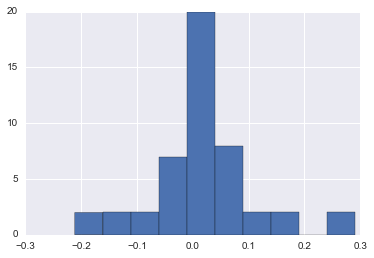

In [46]:
# visualize the histogram of logistic regression model coeffcients
plt.hist(clf2.coef_[0])

In [47]:
# perform GridSearch for logistic regression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [ 0.1, 0.5, 1., 5.], 
              'class_weight': [None, 'balanced'], 
             }

# Initialize the classifier
clf = LogisticRegression(random_state=random_state)

# clf.predict_proba() returns a matrix of (nrow, nclass), and here I have to choose one column as y_predict
def score_function(y_true, y_predict, ):
    return metrics.roc_auc_score(y_true, y_predict[:, 1])

# Make an f1 scoring function using 'make_scorer' 
auc_scorer = metrics.make_scorer(score_function, needs_proba=True)

# train-test split 
tscv = TimeSeriesSplit(n_splits=5)

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=auc_scorer, cv=tscv)

grid_obj.fit(ScaledX, Y)

GridSearchCV(cv=TimeSeriesSplit(n_splits=5), error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=46, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.5, 1.0, 5.0], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(score_function, needs_proba=True), verbose=0)

In [48]:
# Get the best estimator, score, and a list of scores for all models
print 'Best Estimator :', grid_obj.best_estimator_
print 'Best Score :', grid_obj.best_score_
print 'All Scores :', grid_obj.cv_results_['mean_test_score']

Best Estimator : LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=46,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Best Score : 0.70472962696
All Scores : [ 0.70462495  0.70472963  0.70459994  0.70471147  0.70458925  0.70470353
  0.70456702  0.70468965]


In the GridSearchCV, I used 8 different combinations of parameters. The cv scores are similar at around 0.705 for all models. Essentially the model results are not improved by tuning regularization parameter C nor introducing class weights. 

#### Optimize random forest parameters
In the previous Implementation section, random forest model gives training scores of almost 1 and cv scores around 0.64, indicating that there are significant overfitting with the default model parameters. In this section, we optimize parameters for random forest classifier. 

In [52]:
# Perform GridSearch for random forest
# Two different grid search techniques are performed: one is randomized grid search, 
# and the other is standard grid search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

clf = RandomForestClassifier(random_state=random_state, n_jobs=-1)

# Perform randomized grid search 
# define distribution
param_dist = {
              "n_estimators": sp_randint(50, 250),
              "max_features": sp_randint(5, 47),
              "min_samples_split": sp_randint(10, 100),
              "min_samples_leaf": sp_randint(10, 100),
              "bootstrap": [True, False],
              "criterion": ["gini", ]}

# run randomized search
n_iter_search = 20
grid_obj1 = RandomizedSearchCV(clf, param_distributions=param_dist, scoring=auc_scorer, cv=tscv, 
                                   n_iter=n_iter_search, random_state=random_state)
grid_obj1.fit(ScaledX, Y)


# Get the best estimator and score
print grid_obj1.best_estimator_
print grid_obj1.best_score_

# Perform standard grid search
parameters = {"n_estimators": [150, 250],
              "max_features": [5, 10, 20, 40],
              "min_samples_split": [20, 50, 80],
              "criterion": ["gini", ]}
grid_obj2 = GridSearchCV(clf, param_grid=parameters, scoring=auc_scorer, cv=tscv)

grid_obj2.fit(ScaledX, Y)

# Get the estimator
print grid_obj2.best_estimator_
print grid_obj2.best_score_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=28,
            min_samples_split=17, min_weight_fraction_leaf=0.0,
            n_estimators=204, n_jobs=-1, oob_score=False, random_state=46,
            verbose=0, warm_start=False)
0.707752896271
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=80, min_weight_fraction_leaf=0.0,
            n_estimators=250, n_jobs=-1, oob_score=False, random_state=46,
            verbose=0, warm_start=False)
0.707055267628


The best scores are similar for RandomziedSearchCV and GridSearchCV, and also similar to the best score from Logistic Regression. The fact that there's little improvement for random forest compared to logistic regression suggests that there aren't much non-linear combinations of features that have predictive power here. 


## IV. Results

### Model Evaluation and Validation
According to the Refinement section, there's little difference in cv scores between Logistic Regression and Random Forest. Even though the differences in cv scores are very small, yet I chose the model with the best cv score, which is a random forest model obtained with RandomizedSearchCV.

#### Feature Importance
In this section, I rank features according to their importance in the best random forest model. 

Feature ranking:
Feature sub_grade_c (0.139436)
Feature int_rate (0.128899)
Feature grade_c (0.114816)
Feature dti (0.079587)
Feature annual_inc (0.065485)
Feature term_c (0.065099)
Feature fico_range_low (0.048565)
Feature installment (0.046026)
Feature revol_util (0.044511)
Feature loan_amnt (0.040633)
Feature revol_bal (0.040533)
Feature total_acc (0.029343)
Feature cr_num_years (0.026091)
Feature open_acc (0.022939)
Feature emp_length_c (0.022389)
Feature home_ownership_c (0.020259)
Feature verification_status_c (0.012622)
Feature inq_last_6mths_c (0.008603)
Feature desc_isnull (0.006650)
Feature mths_since_last_delinq_isnull (0.005678)
Feature purpose_debt_consolidation (0.004729)
Feature emp_title_isnull (0.003906)
Feature emp_length_isnull (0.003801)
Feature purpose_credit_card (0.003334)
Feature delinq_2yrs_c (0.003208)
Feature purpose_small_business (0.002456)
Feature mths_since_last_record_isnull (0.002146)
Feature pub_rec_bankruptcies (0.002078)
Feature pub_rec_c (0.002051)


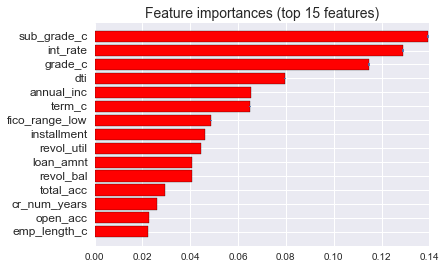

In [70]:
# get feature importance scores from the best random forest model
feature_importance = grid_obj1.best_estimator_.feature_importances_
# get the corresonding column names
columns = ReducedLoanData.drop(['binary_loan_status', 'issue_d', 'delinq_2yrs', 'inq_last_6mths', 
                                'pub_rec', 'delinq_amnt', 'tax_liens'], axis=1).columns
# get the standard deviation of these feature importance scores
std = np.std([tree.feature_importances_ for tree in grid_obj1.best_estimator_], axis=0)
# sort the feature importance scores
indices = np.argsort(feature_importance)[::-1]

# Print sorted feature ranking
print("Feature ranking:")
for i in range(len(columns)):
    print("Feature %s (%f)" % (columns[indices[i]], feature_importance[indices[i]]))

# Plot the feature importances of the forest
plt.figure()
# visualize only the top 15 important features
top_n = 15
plt.title("Feature importances (top %d features)"%(top_n), fontsize=14)
plt.barh(range(top_n), feature_importance[indices][:top_n],
       color="r", yerr=std[indices][:top_n], align="center")
plt.yticks(range(top_n), columns[indices][:top_n], fontsize=12)
plt.ylim([-1, top_n])
plt.gca().invert_yaxis()
plt.show()

The most important features here are mostly loan related features such as `sub_grade`, `int_rate`, `grade`, `term` (36 or 60 months), `installment`, `loan_amnt`; and borrow credit related features such as `dti` (debt to income ratio), `annual_inc`,  `fico_range_low` (fico score), `revol_util`, `revol_bal`, `tot_acc`, `cr_num_years`, `open_acc`, `emp_length`. In fact the top three important features are all loan related features. This is not surprising since borrower's credit related features determined the grade and interest rate of their loan. These most important features are in agreement with previous lendingclub data analysis. 

#### Sensitivity Analysis
In this section, I perform sensitivity analysis to check how classification results change upon small pertubations over the input data. Specifically, I add a small pertubation `delta` to each feature, and calculate the change in cv score. 

In [93]:
# perform sensitivity analysis
# for each feature, add a small perturbation delta to that feature and check how much score changes 
def sensitivity_analysis(Xall, Yall, clf, cv=tscv, delta=0.01):
    # store the cv scores for original features and all perturbed features for all 5 folds. 
    test_score = np.zeros((Xall.shape[1] + 1, 5))
    
    id = 0
    for train_index, test_index in tscv.split(Xall):
        # obtain train and test data
        X_train = Xall[train_index]
        y_train = Yall[train_index]
        X_test = Xall[test_index]
        y_test = Yall[test_index]     
        
        # train for data thats not perturbed 
        clf.fit(X_train, y_train)
        # calculate cv score for data thats not perturbed
        test_score[0, id] = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
        
        # calculate cv score for each feature thats perfurbed 
        for i in range(Xall.shape[1]):
            # add a small perturbation delta to the feature
            Xtestcopy = X_test.copy()
            Xtestcopy[:, i] += delta
            # calculate cv score for the perturbed data
            test_score[i+1, id] = metrics.roc_auc_score(y_test, clf.predict_proba(Xtestcopy)[:,1])
        
        id += 1
    # return average score for all folds
    return test_score.mean(axis=1)

delta = 0.01
avg_test_score = sensitivity_analysis(ScaledX, Y, grid_obj1.best_estimator_, tscv, delta)
print 'change in score with respect to perturbation delta'
# avg_test_score[0] is the baseline score without pertubation
print (avg_test_score[1:] - avg_test_score[0]) / delta

According to the above results, the changes in scores are very small or even zero for perturbations applied to all features, indicating that the model is stable enough for predictions.

### Justification
There are two set of benchmarks established earlier in the project. The first one is random guessing with auc score of 0.5 and the second set includes previous results using lendingclub data: 
- Ref [3]: AUC 0.698
- Ref [5]: AUC 0.732
- Ref [6]: AUC 0.713

The result here with auc score 0.707 is much better than random guessing, and similar to previous results. Ref. [5] and [6] give slightly better score. In fact, the best score in Ref. [5] came from a logistic regression model and was better than optimized random forest model. One of the reason contributes to the difference may be that Ref. [5] and [6] used different cross-validation split methods than the forward chaining cross-validation used in this study.  


## V. Conclusion 

### Free-Form Visualization 
Here I visualize the ROC curve for the final model. The x-axis for the ROC curve is FP (False Positive) rate and the y-axis is TP (True positive) rate. The plot shows that the model prediction is better han random guess, which is the diagonal line running from (0, 0) to (1, 1). The different lines in the plot correspond to the different folds in the cross-validation process.

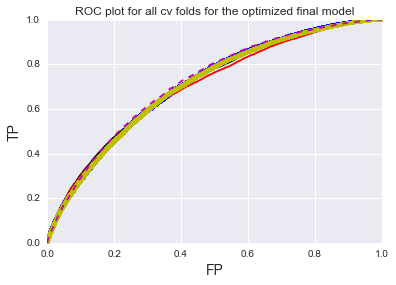

In [104]:
# visualize ROC curve for the final model 
def plot_roc_curve(Xall, Yall, clf, cv=tscv):
    styles = ['-k', '-r' ,'.b', '.-y', '--m']
    id = 0
    for train_index, test_index in tscv.split(Xall):
        # obtain train and test data
        X_train = Xall[train_index]
        y_train = Yall[train_index]
        X_test = Xall[test_index]
        y_test = Yall[test_index]     
        
        # train data
        clf.fit(X_train, y_train)
        # obtain ROC curve data
        fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1])
        # plot ROC curve
        plt.plot(fpr, tpr, styles[id])
        id += 1
        
plot_roc_curve(ScaledX, Y, grid_obj1.best_estimator_, tscv)
plt.xlabel('FP', fontsize=14)
plt.ylabel('TP', fontsize=14)
plt.title('ROC plot for all cv folds for the final model', fontsize=14)

### Reflection
#### Summary of the entire end-to-end problem solution
The workflow for this problem is: 
1. Data cleaning and pre-processing
    - handle missing values and columns that have systematic missing values;
    - convert categorical variables into numerical variables depends on whether the categorical variables are nominal or not. If they are nominal, use ordered number; and if they are not, use dummy variables; 
    - convert other relevant variables to numerical ones, for example, convert `earliest_cr_line` which is year, to number of years with credit history;
    - remove outliers;
    - normalize features;
2. Train and optimize classifier
    - perform rolling cross validation for time series data;
    - compare resampling techniques: no resampling, random under sampling and random over sampling
    - compare three classification models: Naive Bayes, Logistic Regression and Ensemble (Random Forest);
    - optimize model parameters and find the best model/parameters;
3. Compare results with benchmark models

#### Reflection on the project
Initially I thought the project is easy, since there has been quite a few other efforts available online, see Ref[1-8]. Most of these references performed classification to predict whether a loan defaults; except in Ref. [8] where the goal is not only to predict default as a classification task, but also to predict severity of the loss as a regression task. My initial goal is to use lendingclub data, but go beyond those previous efforts and predict return on investment (ROI). 

Since there was no previous work on predicting ROI using lendingclub data, my plan was to first perform a classification task to predict default, compare the results with previous models, and move on to work on how to predict ROI. However, it turned out that the classification problem was more challenging than I thought, there are various problems with previous work (detailed in Project Overview Section), and I found out just completing the loan default prediction is worthwhile as a standalone project. 

Here are the interesting and challenging aspects of the project: 
- The dataset has over 115 columns, is diverse and non-trivial for data cleaning and preprocessing. One has to read the description of all 115 columns in order to remove columns thats not supposed to be used. This was a mistake made by a few previous work and their results are incorrect and misleading. There are also various ways data is missing, has outliers, and has different ways to be converted to numeric data. I found the data cleaning and pre-processing more challenging and time consuming than I presumed. 
- The data is a time-series data, thus random or stratified shuffle spliting for training and testing dataset might not be appropriate; however, none of the previous work mentioned the time-series aspect. 
- The prediction classes are not balanced, with default loan occupying around 20% of all data. However, under and over sampling have neglectable effect on cv scores. 
- Logistic regression has similar results compared to random forest. This is rather surprising to me. With Kaggle's loan dataset, ensemble methods are reported to be much better than logistic regression and gives auc score over 0.85. In this blogpost (http://blog.nycdatascience.com/student-works/capstone/kaggle-predict-consumer-credit-default/), the authors were able to increase the score for logistic regression using features from non-linear combination of original features. However, these non-linear combination of features are inherently present in ensemble methods and thus feature engineering doesn't improve performance for ensemble methods. In the current case with lendingclub data ( Kaggle has a different dataset), ensemble methods are only slightly better than logistic regression. I tried a number of feature selection/ellimination methods, as well as producing non-linear combination of features, but none of my work has resulted in any significant improvements. 

The final model and solution doesn't fit my expectation for the problem, and I expect the model to perform better. In a future project, I might work with Kaggle dataset and find out why Kaggle dataset gives better scores. In addition, as I mentioned in Project Overview, best predicting loan default does not neccessarily give best ROI, since it will reject default loans regardless on how much amount is the loss. As a result, one has to solve a different problem in order to optimize ROI. 

### Improvement
One possible improvement to the final auc score is convert additional columns to features. The columns that are currently not used are `zip_code` and `addr_state`. One can use econometric values such as median income of the zip code or state. Another possible improvement is to use text as a vector for columns `title` and `desc`. There are many missing values there, and in this project I only used boolean values to represent them. However I doubt the effectiveness of them compared to features such as `int_rate` and `annual_inc`.

Further improvement to the project is to predict ROI, since ROI is what eventually matters. 

-----------

### References
1. http://cs229.stanford.edu/proj2015/199_report.pdf
2. http://blog.yhat.com/posts/machine-learning-for-predicting-bad-loans.html
3. https://rpubs.com/torourke97/190551
4. https://res.cloudinary.com/general-assembly-profiles/image/upload/v1416535475/uwumoooppttsmpgu1goo.pdf
5. http://www.wujiayu.me/assets/projects/loan-default-prediction-Jiayu-Wu.pdf
6. https://rstudio-pubs-static.s3.amazonaws.com/203258_d20c1a34bc094151a0a1e4f4180c5f6f.html
7. http://kldavenport.com/gradient-boosting-analysis-of-lendingclubs-data/
8. https://www.kaggle.com/c/loan-default-prediction
9. https://www.kaggle.com/wiki/AreaUnderCurve
10. http://stats.stackexchange.com/questions/14099/using-k-fold-cross-validation-for-time-series-model-selection